In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt

In [3]:
dataset = pd.read_csv('C:/Cygnss/report/ML/data_3km.csv')
# month_day_num = []
# for i in range(976):
#     day_num = dataset['day_num'][i]
# #     if ((day_num <= 31) & (day_num >= 1)):
# #         month_day_num.append('jan'+str(day_num))
#     if ((day_num >= 91) & (day_num <= 120)):
# #         month_day_num.append('april'+str(day_num - 90))
#         print(i)
#     if ((day_num >= 182) & (day_num <= 212)):
# #         month_day_num.append('july'+str(day_num - 181))
#         print('July', i)
# # dataset['date']= month_day_num

In [4]:
data = dataset.iloc[:,4:]

In [5]:
y = data['txson_gt']
X = data.iloc[:,:-1]

In [25]:
data

,preff,inc_angle,elevation,clay,sand,silt,depres,ndvi,pow_mean,pow_var,pow_skew,pow_kurt,txson_gt
0,152.839042,37.919052,500.277008,50.0,22.1,27.9,201.0,4562,-690.990051,6432023.0,-3.397408,9.544185,0.286834
1,152.661684,37.938034,486.428375,17.5,43.0,39.5,201.0,4416,-690.990051,6432023.0,-3.397408,9.544185,0.335167
2,152.786237,37.957127,480.731262,10.5,76.0,13.5,201.0,3901,-690.990051,6432023.0,-3.397408,9.544185,0.263055
3,151.391626,37.976330,483.185364,22.5,39.8,37.7,46.0,5288,-690.990051,6432023.0,-3.397408,9.544185,0.283402
4,150.778259,37.995640,470.681946,7.5,85.9,6.6,201.0,5203,-690.990051,6432023.0,-3.397408,9.544185,0.287668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,151.772158,34.456806,503.060455,7.5,85.9,6.6,201.0,4771,-632.182190,5922417.0,-3.588071,10.879371,0.154208
972,151.977943,34.474243,492.882843,17.5,43.0,39.5,201.0,5950,-632.182190,5922417.0,-3.588071,10.879371,0.154208
973,151.624494,34.491711,493.881653,7.5,85.9,6.6,201.0,6256,-632.182190,5922417.0,-3.588071,10.879371,0.133220
974,150.942498,34.509193,490.095276,10.5,76.0,13.5,201.0,6574,-632.182190,5922417.0,-3.588071,10.879371,0.106958


In [12]:
def train_ann(variables):
    X_sel = data[variables]
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
    scalar = StandardScaler()
    scalar.fit(X_train)
    
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    X_sel = scalar.transform(X_sel)

    param_grid = {
        'hidden_layer_sizes': [(10,10), (10,100), (100,10), (100,100), 
                               (10, 10,10), (10, 10,100), (10, 100,10), (10, 100,100),
                               (100,10,10), (100,10,100), (100,100,10), (100,100,100)
                              ]
    }

#     param_grid = {
#         'hidden_layer_sizes': [(10,5),(10,10), (10, 20)
#                               ]
#     }

    grid = GridSearchCV(MLPRegressor(random_state=1, max_iter=1000), param_grid = param_grid,
                      scoring = 'neg_mean_squared_error')
    
    regr = grid.fit(X_train, y_train)
#     y_pred = cross_val_predict(grid, X_train, y_train)
    
    pred_train = regr.predict(X_train)
    pred_test = regr.predict(X_test)
    pred_all = regr.predict(X_sel)
    score_train = regr.score(X_train, y_train)
    score_test = regr.score(X_test, y_test)
    score_all = regr.score(X_sel, y)
    
    print(grid.best_params_)
    print(np.round(pearsonr(pred_train, y_train),4))
    print(np.round(pearsonr(pred_test, y_test),4))
#     print(np.round(pearsonr(pred_all, y),4))
    
    
    print('Test RMSE: {}'.format(np.round(sqrt(mean_squared_error(y_test, pred_test)),4)))
    
    reg = LinearRegression().fit(X_train, y_train)
    pred_test = reg.predict(X_test)
#     print(np.round(pearsonr(pred_test, y_test),4))
    
#     print(score_train, score_test, score_all)
#     print(np.round(grid.score(X_test, y_test),4))
    return grid, X_sel, pred_all

{'hidden_layer_sizes': (10, 100, 100)}
[0.5343 0.    ]
[0.5801 0.    ]
Test RMSE: 0.0553


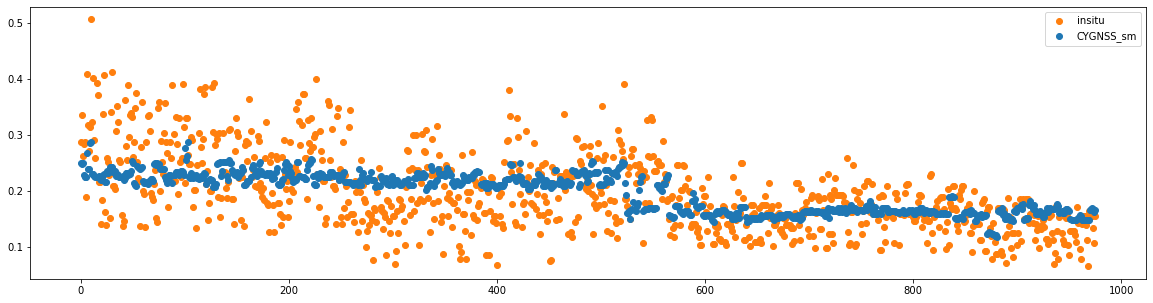

In [28]:
variables_sel = ['preff', 'inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt']
regr, X, preds = train_ann(variables_sel)
fig, ax = plt.subplots(figsize = (20,5))
ax.scatter(data.index, y, c = 'tab:orange',label = 'insitu')
ax.scatter(data.index, preds, label = 'CYGNSS_sm')
ax.legend()
plt.show()

{'hidden_layer_sizes': (100, 10, 100)}
[0.4866 0.    ]
[0.5201 0.    ]
Test RMSE: 0.0579


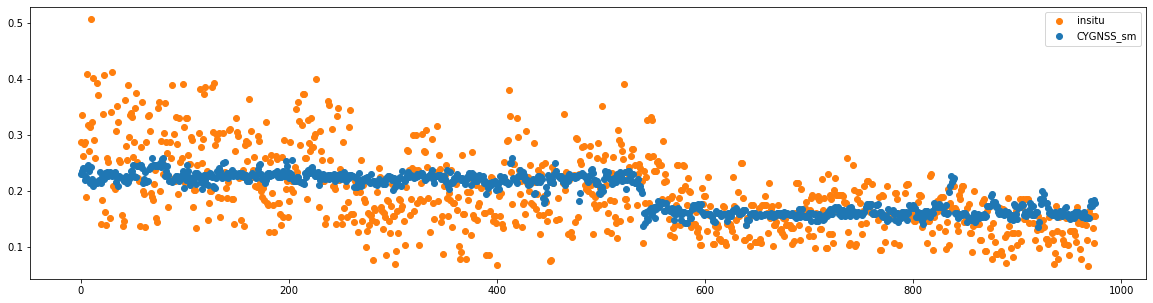

In [14]:
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'clay']
regr, X, preds = train_ann(variables_sel)
fig, ax = plt.subplots(figsize = (20,5))
ax.scatter(data.index, y, c = 'tab:orange',label = 'insitu')
ax.scatter(data.index, preds, label = 'CYGNSS_sm')
ax.legend()
plt.show()

{'hidden_layer_sizes': (10, 100, 100)}
[0.6255 0.    ]
[0.65 0.  ]
Test RMSE: 0.0523


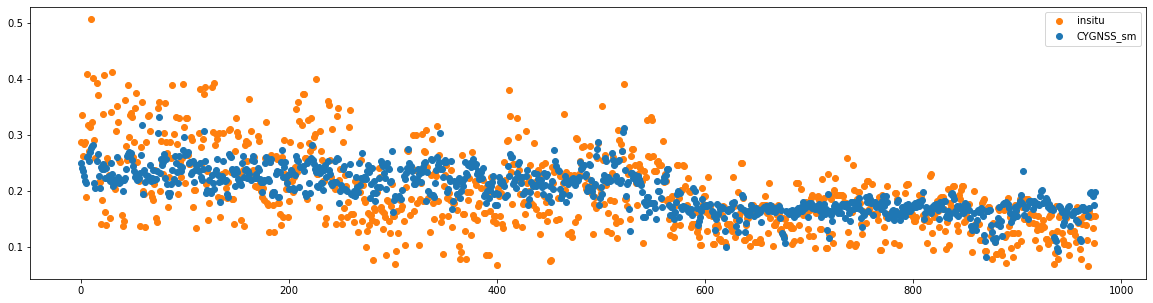

In [15]:
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'elevation']
regr, X, preds = train_ann(variables_sel)
fig, ax = plt.subplots(figsize = (20,5))
ax.scatter(data.index, y, c = 'tab:orange',label = 'insitu')
ax.scatter(data.index, preds, label = 'CYGNSS_sm')
ax.legend()
plt.show()

{'hidden_layer_sizes': (100, 100, 100)}
[0.6751 0.    ]
[0.6104 0.    ]
Test RMSE: 0.0538


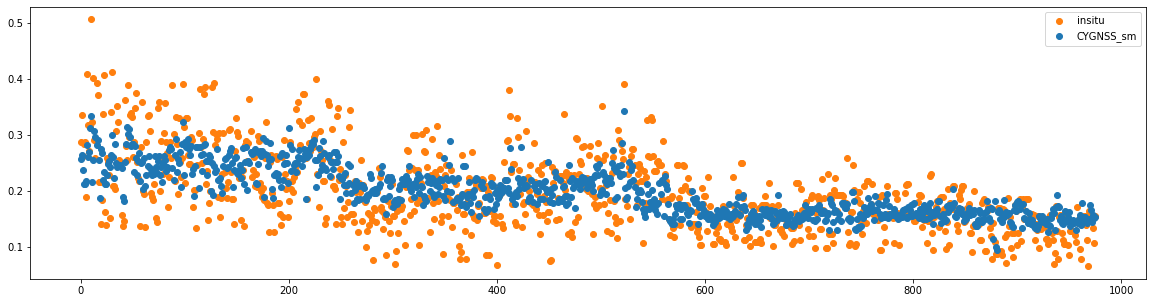

In [16]:
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'ndvi']
regr, X, preds = train_ann(variables_sel)
fig, ax = plt.subplots(figsize = (20,5))
ax.scatter(data.index, y, c = 'tab:orange',label = 'insitu')
ax.scatter(data.index, preds, label = 'CYGNSS_sm')
ax.legend()
plt.show()

{'hidden_layer_sizes': (10, 100, 100)}
[0.5806 0.    ]
[0.5697 0.    ]
Test RMSE: 0.0563


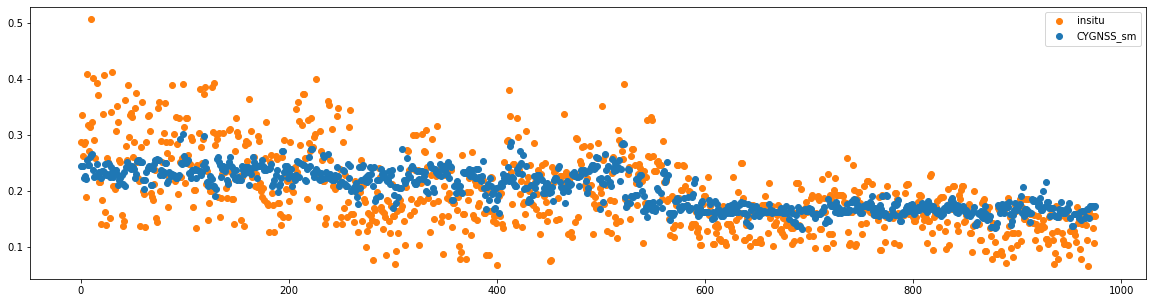

In [17]:
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'depres']
regr, X, preds = train_ann(variables_sel)
fig, ax = plt.subplots(figsize = (20,5))
ax.scatter(data.index, y, c = 'tab:orange',label = 'insitu')
ax.scatter(data.index, preds, label = 'CYGNSS_sm')
ax.legend()
plt.show()

{'hidden_layer_sizes': (100, 100, 100)}
[0.7537 0.    ]
[0.6794 0.    ]
Test RMSE: 0.0497


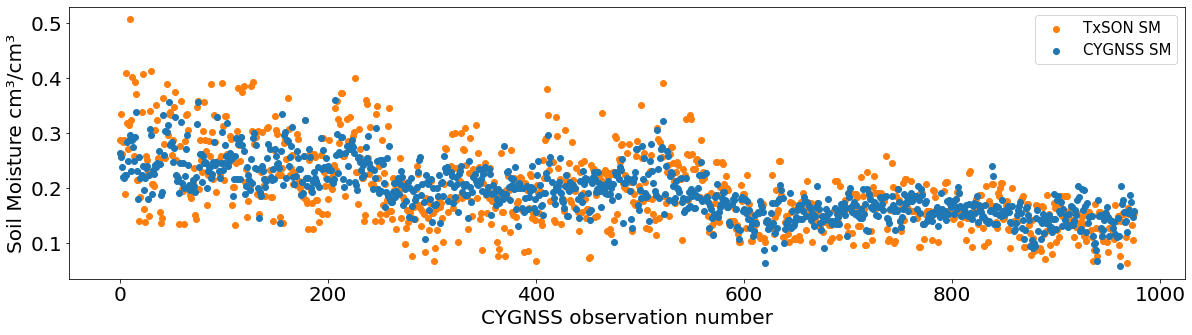

In [50]:
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'elevation', 'ndvi','depres']
regr, X, preds = train_ann(variables_sel)
fig, ax = plt.subplots(figsize = (20,5))
ax.scatter(data.index, y, c = 'tab:orange',label = 'TxSON SM')
ax.scatter(data.index, preds, label = 'CYGNSS SM')
ax.set_xlabel('CYGNSS observation number')
ax.set_ylabel('Soil Moisture cm\u00b3/cm\u00b3')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xticks(np.arange(min(data.index), max(data.index), 20))
# plt.xticks(np.array([0,260,516]))
ax.legend(prop = {'size':15})
plt.savefig('C:/Cygnss/report/figures/res_3km_big.jpg')
plt.show()


{'hidden_layer_sizes': (100, 10, 100)}
[0.6224 0.    ]
[0.6201 0.    ]
Test RMSE: 0.0532


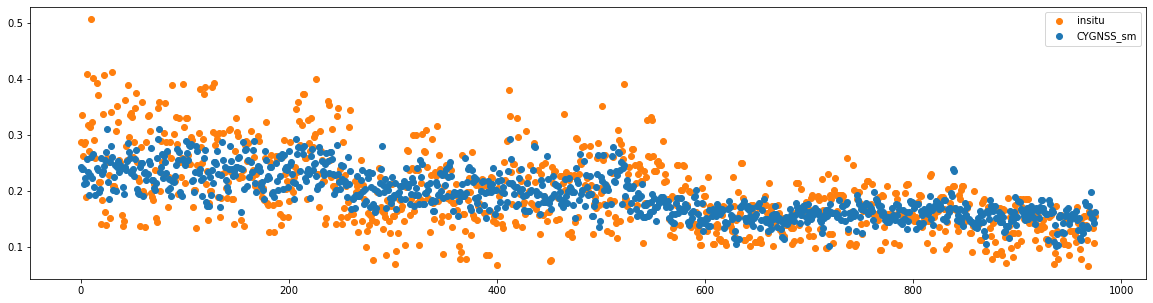

In [19]:
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'elevation', 'ndvi', 'depres', 'clay']
regr, X, preds = train_ann(variables_sel)
fig, ax = plt.subplots(figsize = (20,5))
ax.scatter(data.index, y, c = 'tab:orange',label = 'insitu')
ax.scatter(data.index, preds, label = 'CYGNSS_sm')
ax.legend()
plt.show()

In [312]:
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'clay', 'elevation']
train_ann(variables_sel)

{'hidden_layer_sizes': (10, 20)}
[0.3183 0.    ]
-0.005


In [292]:
# variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt']
variables_sel = ['preff','inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt']
X_sel = data[variables_sel]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
X_sel = scalar.transform(X_sel)

param_grid = {
    'hidden_layer_sizes': [(10,10), (10,100), (100,10), (100,100), 
                           (10, 10,10), (10, 10,100), (10, 100,10), (10, 100,100),
                           (100,10,10), (100,10,100), (100,100,10), (100,100,100), (20,10)
                          ]
}

grid = GridSearchCV(MLPRegressor(random_state=1, max_iter=1000), param_grid = param_grid,
                   scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
pred_sel = grid.predict(X_test)
print(grid.best_params_)
print(np.round(pearsonr(pred_sel, y_test),4))
print(np.round(grid.score(X_test, y_test),4))

{'hidden_layer_sizes': (100, 100, 10)}
[0.6642 0.    ]
-0.0018


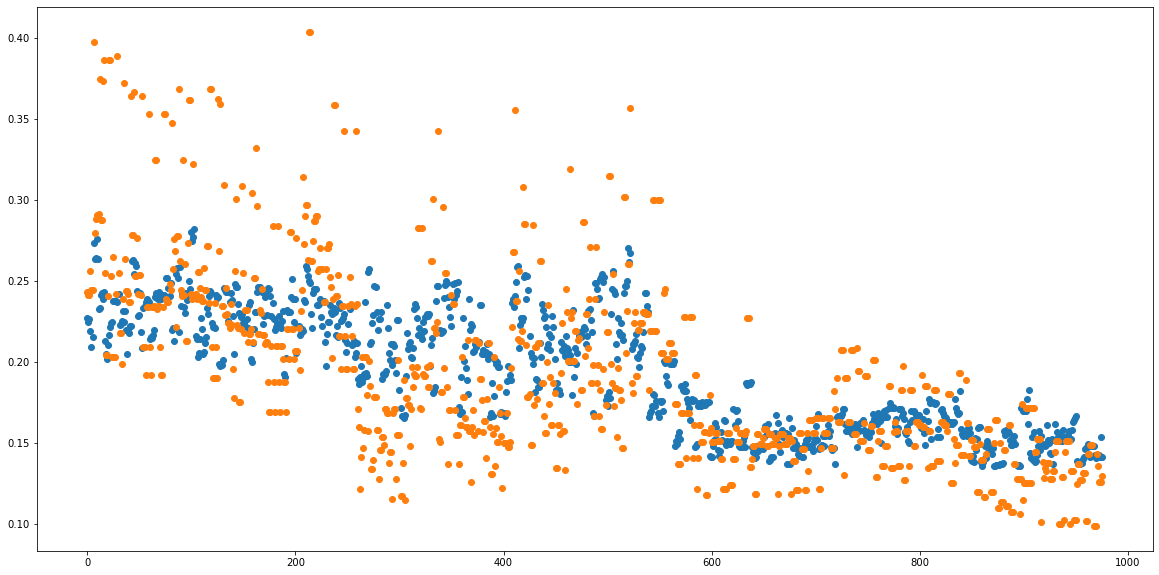

In [255]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(dataset.index,grid.predict(X_sel))
ax.scatter(dataset.index,y)

In [264]:
variables_sel = ['preff', 'inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'elevation', 'ndvi','depres']
X_sel = data[variables_sel]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# param_grid = {
#     'hidden_layer_sizes': [(10,10), (10,10,10), (10,100), (10,100,10), (10,100,100)]
# }


param_grid = {
    'hidden_layer_sizes': [(10,10), (10,100), (100,10), (100,100), 
                           (10, 10,10), (10, 10,100), (10, 100,10), (10, 100,100),
                           (100,10,10), (100,10,100), (100,100,10), (100,100,100)]
}

grid = GridSearchCV(MLPRegressor(random_state=1, max_iter=1000), param_grid = param_grid,
                   scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
pred_sel = grid.predict(X_test)
print(grid.best_params_)
print(np.round(pearsonr(pred_sel, y_test),4))
print(np.round(grid.score(X_test, y_test),4))

{'hidden_layer_sizes': (100, 10, 100)}
[0.7024 0.    ]
-0.0017


In [259]:
variables_sel = ['preff', 'inc_angle', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'ndvi']
X_sel = data[variables_sel]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# param_grid = {
#     'hidden_layer_sizes': [(10,10), (10,10,10), (10,100), (10,100,10), (10,100,100)]
# }


param_grid = {
    'hidden_layer_sizes': [(10,10), (10,100), (100,10), (100,100), 
                           (10, 10,10), (10, 10,100), (10, 100,10), (10, 100,100),
                           (100,10,10), (100,10,100), (100,100,10), (100,100,100)]
}

grid = GridSearchCV(MLPRegressor(hidden_layer_sizes = (10,100,10), random_state=1, max_iter=1000), param_grid = param_grid,
                   scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
pred_sel = grid.predict(X_test)
print(grid.best_params_)
print(np.round(pearsonr(pred_sel, y_test),4))
print(np.round(grid.score(X_test, y_test),4))

{'hidden_layer_sizes': (100, 100, 100)}
[0.6801 0.    ]
-0.0018


In [248]:
variables_sel = ['preff', 'inc_angle', 'clay', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'depres']
X_sel = data[variables_sel]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# param_grid = {
#     'hidden_layer_sizes': [(10,10), (10,100), (100,10), (10,10,10), (10,100,100), (10,100,10), (10,100,100)]
# }


param_grid = {
    'hidden_layer_sizes': [(10,10), (10,100), (100,10), (100,100), 
                           (10, 10,10), (10, 10,100), (10, 100,10), (10, 100,100),
                           (100,10,10), (100,10,100), (100,100,10), (100,100,100)]
}

grid = GridSearchCV(MLPRegressor(random_state=1, max_iter=1000), param_grid = param_grid,
                   scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
pred_sel = grid.predict(X_test)
print(grid.best_params_)
print(np.round(pearsonr(pred_sel, y_test),4))
print(np.round(grid.score(X_test, y_test),4))

{'hidden_layer_sizes': (100, 100, 10)}
[0.6091 0.    ]
-0.0021


In [239]:
grid.best_params_

{'hidden_layer_sizes': (10, 100, 100)}

In [146]:
variables_sel = ['preff', 'inc_angle', 'clay', 'pow_mean']
X_sel = data[variables_sel]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

param_grid = {
    'hidden_layer_sizes': [(10,10), (10,10,10), (10,100), (10,100,10), (10,100,100)]
}

grid = GridSearchCV(MLPRegressor(hidden_layer_sizes = (10,100,10), random_state=1, max_iter=1000), param_grid = param_grid,
                   scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
pred_sel = grid.predict(X_test)
print(grid)
print(pearsonr(pred_sel, y_test))

GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(10, 100, 10),
                                    max_iter=1000, random_state=1),
             param_grid={'hidden_layer_sizes': [(10, 10), (10, 10, 10),
                                                (10, 100), (10, 100, 10),
                                                (10, 100, 100)]},
             scoring='neg_mean_squared_error')
(0.5226519368537235, 3.9158859046917555e-15)


In [154]:
variables_sel = ['preff', 'inc_angle', 'clay', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt', 'elevation', 'ndvi', 'depres']
X_sel = data[variables_sel]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.9)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

param_grid = {
    'hidden_layer_sizes': [(10,10), (10,10,10), (10,100), (10,100,10), (10,100,100)]
}

grid = GridSearchCV(MLPRegressor(hidden_layer_sizes = (10,100,10), random_state=1, max_iter=1000), param_grid = param_grid,
                   scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
pred_sel = grid.predict(X_test)
print(grid)
print(pearsonr(pred_sel, y_test))

GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(10, 100, 10),
                                    max_iter=1000, random_state=1),
             param_grid={'hidden_layer_sizes': [(10, 10), (10, 10, 10),
                                                (10, 100), (10, 100, 10),
                                                (10, 100, 100)]},
             scoring='neg_mean_squared_error')
(0.6821755903421753, 1.0414438271629462e-14)


0.34108556203437457
(0.5921475847011647, 6.197474362441209e-20)


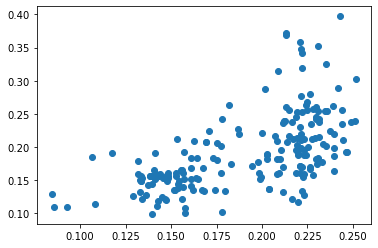

In [121]:
variables_sel = ['preff', 'inc_angle', 'clay', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt']
X_sel = data[sel_variables]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
# regr = MLPRegressor(hidden_layer_sizes = (10,100,100, 100, 100,100,10), random_state=1, max_iter=1000).fit(X_train, y_train)
# regr.predict(X_test[:2])
regr = MLPRegressor(hidden_layer_sizes = (10,100,10), random_state=1, max_iter=1000).fit(X_train, y_train)
print(regr.score(X_test, y_test))
preds_sel = regr.predict(X_test)
print(pearsonr(preds_sel, y_test))
plt.scatter(preds_sel, y_test)

In [163]:
grid.best_score_

-0.0022325964993419583

0.3298838249348566
(0.5659681094126652, 2.9431794960164103e-67)


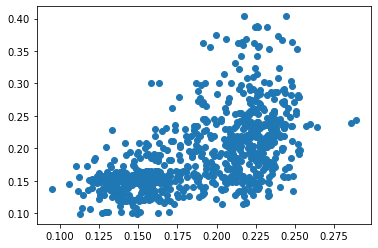

In [117]:
variables_sel = ['preff', 'inc_angle', 'clay', 'silt', 'pow_mean', 'pow_var', 'pow_skew', 'pow_kurt']
X_sel = data[variables_sel]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1, train_size = 0.8)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
# regr = MLPRegressor(hidden_layer_sizes = (10,100,100, 100, 100,100,10), random_state=1, max_iter=1000).fit(X_train, y_train)
# regr.predict(X_test[:2])
regr = MLPRegressor(hidden_layer_sizes = (10,100,10), random_state=1, max_iter=1000).fit(X_train, y_train)

print(regr.score(X_test, y_test))

preds_sel = regr.predict(X_train)
print(pearsonr(preds_sel, y_train))

plt.scatter(preds_sel, y_train)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.8)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
regr = MLPRegressor(hidden_layer_sizes = (10,100,100, 100, 100,100,10), random_state=1, max_iter=1000).fit(X_train, y_train)
# regr.predict(X_test[:2])

print(regr.score(X_test, y_test))
preds = regr.predict(X_test)

0.4224563195504759


In [85]:
preds

array([0.15776017, 0.16522659, 0.22775295, 0.24347732, 0.21199178,
       0.2307029 , 0.14843221, 0.23261954, 0.16637084, 0.22408642,
       0.22206764, 0.14889523, 0.21700634, 0.231626  , 0.22219436,
       0.22245027, 0.17121657, 0.23750842, 0.2231447 , 0.17383887,
       0.2247599 , 0.21030749, 0.17078906, 0.2181304 , 0.21668279,
       0.25341721, 0.15567316, 0.14947839, 0.17527072, 0.23447749,
       0.17656315, 0.18175659, 0.22697827, 0.17452371, 0.16237722,
       0.19771351, 0.16698799, 0.22166579, 0.16527971, 0.22632141,
       0.20236676, 0.18445451, 0.15429544, 0.22030812, 0.18557338,
       0.16428071, 0.16846277, 0.17050223, 0.23118304, 0.23631876,
       0.18291194, 0.16084153, 0.24988106, 0.14925117, 0.2300785 ,
       0.22003256, 0.16394633, 0.16913089, 0.24358656, 0.23366832,
       0.16165036, 0.22948838, 0.17044102, 0.22913106, 0.1685188 ,
       0.14830999, 0.22238522, 0.22212126, 0.15228744, 0.1577886 ,
       0.14759301, 0.23727462, 0.15883006, 0.23525873, 0.21724

(0.623485475916759, 1.6732437270312777e-22)


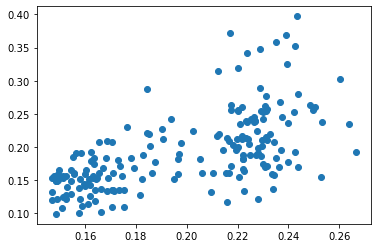

In [81]:
print(pearsonr(preds, y_test))
plt.scatter(preds, y_test)